In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

print('x train, test, val shape : ', x_train.shape, x_test.shape, x_val.shape)
print('y train, test, val shape : ', y_train.shape, y_test.shape, y_val.shape)

170498071/170498071 [==============================] - 4s 0us/step
x train, test, val shape :  (37500, 32, 32, 3) (10000, 32, 32, 3) (12500, 32, 32, 3)
y train, test, val shape :  (37500, 1) (10000, 1) (12500, 1)


In [3]:
# Normalization and convertion of datatype.
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_val = x_val.astype(np.float32) / 255.0

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


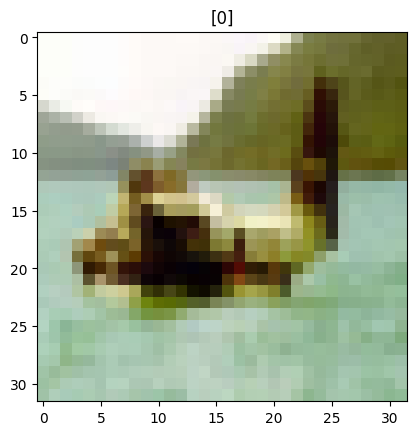

In [4]:
# Visualization of one of the image label pairs.
plt.title(y_train[1])
plt.imshow(x_train[1])
plt.show()

In [5]:
# Simple CNN model with maxpooling

# If padding is set to valid, its the default (i.e no padding)
# If padding is set to same, the image dimensions remain unchanged.

cnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3), name="input_layer"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu', name="conv_2d_1"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name="max_pooling_1"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu', name="conv_2d_2"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), name="max_pooling_2"),
    tf.keras.layers.Flatten(name='flattening_layer'),
    tf.keras.layers.Dense(32, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(10, activation='softmax', name='dense_2'),
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_2d_1 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling_1 (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv_2d_2 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling_2 (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 flattening_layer (Flatten)  (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                1

In [6]:
cnn_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [44]:
def train_eval_plot_model(model, x_train, x_test, x_val, y_train, y_test, y_val):
  history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

  epochs = range(0, len(history.history['loss']))
  plt.title('training vs validation loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(epochs, history.history['loss'], 'r', label="training loss")
  plt.plot(epochs, history.history['val_loss'], 'g', label="validation loss")
  plt.legend()
  plt.show()

  plt.title('training vs validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.plot(epochs, history.history['accuracy'], 'r', label="training accuracy")
  plt.plot(epochs, history.history['val_accuracy'], 'g', label="validation accuracy")
  plt.legend()
  plt.show()

  print('model evaluation on testing data')
  print(model.evaluate(x_test, y_test))

Epoch 1/5
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2297 - accuracy: 0.5610 - val_loss: 1.1872 - val_accuracy: 0.5804
Epoch 2/5
1172/1172 [==============================] - 6s 5ms/step - loss: 1.0924 - accuracy: 0.6104 - val_loss: 1.0480 - val_accuracy: 0.6296
Epoch 3/5
1172/1172 [==============================] - 5s 4ms/step - loss: 0.9984 - accuracy: 0.6483 - val_loss: 1.0121 - val_accuracy: 0.6446
Epoch 4/5
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9276 - accuracy: 0.6731 - val_loss: 1.0058 - val_accuracy: 0.6435
Epoch 5/5
1172/1172 [==============================] - 5s 5ms/step - loss: 0.8739 - accuracy: 0.6916 - val_loss: 0.9786 - val_accuracy: 0.6571


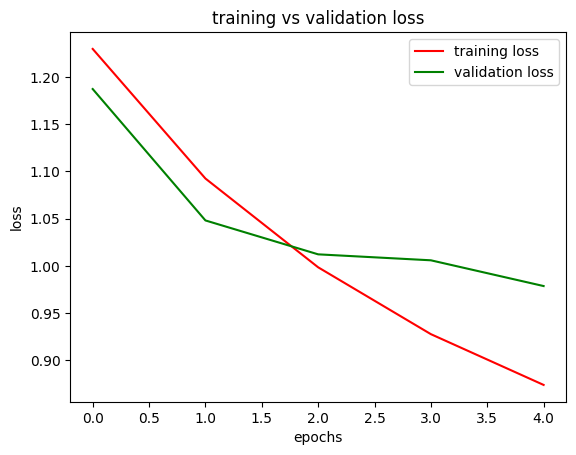

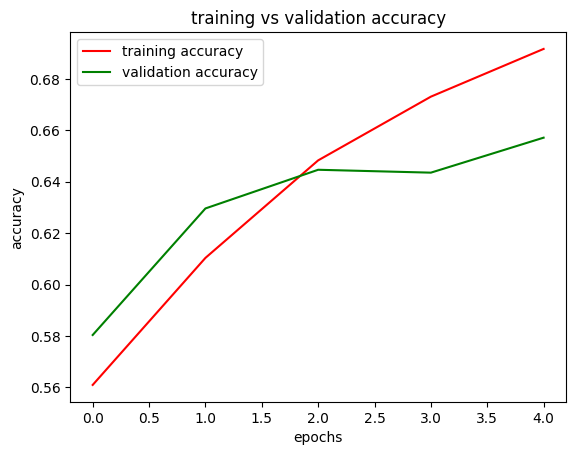

model evaluation on testing data
313/313 [==============================] - 1s 2ms/step - loss: 0.9818 - accuracy: 0.6545
[0.9818007946014404, 0.6545000076293945]


In [10]:
train_eval_plot_model(cnn_model, x_train, x_test, x_val, y_train, y_test, y_val)

In [17]:
tf.keras.losses.SparseCategoricalCrossentropy?

In [42]:
# Using the functional API with batch normalization.
def func_model():
    input = tf.keras.Input(shape=(32,32,3), name="input_layer")
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same',  kernel_regularizer=tf.keras.regularizers.L2(0.01), name="conv_2d_1")(input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), name="max_pooling_1")(x)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', kernel_regularizer=tf.keras.regularizers.L2(0.01), name="conv_2d_2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same',  kernel_regularizer=tf.keras.regularizers.L2(0.01), name="conv_2d_3")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), name="max_pooling_2")(x)
    x = tf.keras.layers.Flatten(name='flattening_layer')(x)
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), name='dense_1')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    output = tf.keras.layers.Dense(10, name='output_layer')(x)

    model = tf.keras.Model(inputs=input, outputs=output)

    print(model.summary())
    return model

model = func_model()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv_2d_1 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_50 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 tf.nn.relu_49 (TFOpLambda)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling_1 (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv_2d_2 (Conv2D)          (None, 16, 16, 64)        1849

Epoch 1/50
1172/1172 [==============================] - 8s 6ms/step - loss: 2.1114 - accuracy: 0.2214 - val_loss: 1.8976 - val_accuracy: 0.3102
Epoch 2/50
1172/1172 [==============================] - 7s 6ms/step - loss: 2.0129 - accuracy: 0.2539 - val_loss: 1.8084 - val_accuracy: 0.3686
Epoch 3/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.9374 - accuracy: 0.2924 - val_loss: 1.6746 - val_accuracy: 0.4544
Epoch 4/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8641 - accuracy: 0.3209 - val_loss: 2.0691 - val_accuracy: 0.2930
Epoch 5/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8125 - accuracy: 0.3429 - val_loss: 1.9050 - val_accuracy: 0.4279
Epoch 6/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7925 - accuracy: 0.3529 - val_loss: 1.8645 - val_accuracy: 0.3142
Epoch 7/50
1172/1172 [==============================] - 8s 6ms/step - loss: 1.7700 - accuracy: 0.3635 - val_loss: 1.7180 - val_accuracy:

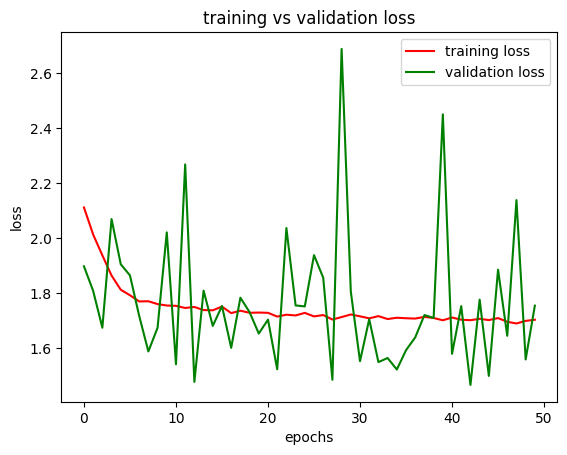

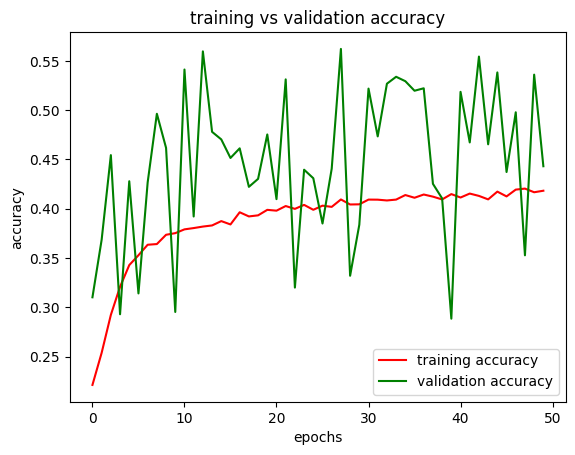

model evaluation on testing data
313/313 [==============================] - 1s 3ms/step - loss: 1.7608 - accuracy: 0.4325
[1.7607933282852173, 0.4325000047683716]


In [45]:
train_eval_plot_model(model, x_train, x_test, x_val, y_train, y_test, y_val)